# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** 20 mins presenting + 60 mins exercises

## Chapter 5: A very basic introduction into machine learning

<font face='Times New Roman' color=red>This notebook will probably need to be run on Google colab or the like, as laptops might not have the right architecture to run this.</font>

### Outline of this mini-workshop

- Mini lecture about Machine Learning  
    - /Users/m.wehrens/Documents/PRESENTATIONS/TEACHING/ML_verybasic.pptx
    
- Go over the questions in this notebook 
    - Don't try to understand all code!



### Exercise: draw 4 images

Open FIJI and create a new 12x12 8bit image. Use the paintbrush tool and color picker to draw four images. Draw 2 images depicting one thing, and two images depicting another thing. E.g. draw 2 images of an apple and two images of a pear. Only spend a few minutes on this. (You can also draw something easier, like numbers, symbols, letters, etc.)

### Run some code

The code below uses pytorch to set up a very simple neural network. "Real" neural networks have a much more complicated architecture. The purpose here is to be able to follow along what's happening in a neural network.

##### Understanding, but not the technical details
The code has some explanatory comments, but it takes too much time to explain fully how pytorch or similar neural network libraries (like tensorflow or keras) work. You're welcome to try and understand the code, but don't get lost in it, the main goal is to understand the concepts of machine learning.

In [14]:
import torch
from torch import nn

from torch.utils.data import Dataset

import numpy as np

import tifffile as tiff
import matplotlib.pyplot as plt

In [189]:
# This code defines a VERY simple model for 12x12 pixels,
# meant for illustratory purposes.

class VerySimpleNN(nn.Module):
    # Pytorch makes use of classes, which are a way to group
    # data and functions together. A class specifies what functions 
    # the class provides, and what data (like parameters) it stores.
    # An object can then be created to actually load data and 
    # call those functions.
    # As an analogy, class definitions are the "blueprint",
    # objects instantiated from the class are the "houses".
    #
    # Here, we define a class (blueprint) for our simple
    # neural network.
    #
    # To learn more about classes, e.g. google for a tutorial on
    # Python classes.
    
    def __init__(self):
        # __init__ is a standard class method, which is 
        # automatically called when an object is created.
        #
        # In this case, it defines how (the layers 
        # of) the network should look.
        
        # technical; calls init of parent class
        super().__init__() 
        
        # Define a flatten function, which in this case
        # can flatten the input (the image) to a 144 element vector
        self.flatten = nn.Flatten() 
        
        # Define a linear layer, which will
        # calculate weights*pixels for 144 element input and 2 output elements
        self.linear = nn.Linear(12*12, 2) 

    def forward(self, x):
        
        # The forward function can be called later to actually
        # generate a prediction.
        # It will use the "components" we defined in __init__.
        # (This is useful when the network is more complicated,
        # and more complex structures or components are defined in __init__, and 
        # the forward function will be less complex.)        
        
        # Now actually use the flatten function to convert
        # the 12x12 input to a 1d 144 long vector.
        x = self.flatten(x)        
            # technical note:
            # typically, input will be supplied in batches,
            # so the input shape will be (batchsize, 12, 12)
            # and the output shape will be (batchsize, 144)
            
        # Now use the linear layer to calculate the 2 element output
        logits = self.linear(x)
        
        return logits

###
# Now test the neural network

# Instantiate the neural network (create an object from the class)
# Technical note: ".to('mps')" tells the computer to run this network
# on an Apple GPU.
simpleNN = VerySimpleNN().to('mps')

# Generate a random 12x12 image
test_data = torch.rand(1, 12, 12, device='mps')  
print('test_data=',test_data)
# Generate a prediction; calling the object will automatically 
# call the forward function (since this is a pytorch class)
# Alternatively, you could also call simpleNN.forward(test_data) 
pred = simpleNN(test_data)
pred_numpy = pred.cpu().detach().numpy()
# Print the prediction
print('pred = \"',pred, '\" (pytorch tensor format)')
print('pred_numpy = \"',pred_numpy,'\" (numpy format)')

test_data= tensor([[[0.8181, 0.6630, 0.2174, 0.8167, 0.3995, 0.3807, 0.5601, 0.4432,
          0.9286, 0.2789, 0.8992, 0.2010],
         [0.7595, 0.7805, 0.7728, 0.6343, 0.0467, 0.6264, 0.1261, 0.3889,
          0.9693, 0.0218, 0.7571, 0.2757],
         [0.1307, 0.1551, 0.3898, 0.2212, 0.0418, 0.1058, 0.6783, 0.3271,
          0.7462, 0.3200, 0.9616, 0.8765],
         [0.8045, 0.6318, 0.0193, 0.3888, 0.0400, 0.8825, 0.0129, 0.7606,
          0.6863, 0.9916, 0.0835, 0.2452],
         [0.3697, 0.0426, 0.2966, 0.3083, 0.4596, 0.0172, 0.9255, 0.4879,
          0.5878, 0.0699, 0.9982, 0.9995],
         [0.8478, 0.6155, 0.1786, 0.4676, 0.9420, 0.1355, 0.8581, 0.1141,
          0.1262, 0.9385, 0.7482, 0.7221],
         [0.2492, 0.7605, 0.0276, 0.6739, 0.6537, 0.3827, 0.1439, 0.8171,
          0.4360, 0.1716, 0.1549, 0.7013],
         [0.8984, 0.6726, 0.0143, 0.9213, 0.6114, 0.2880, 0.6644, 0.4898,
          0.3681, 0.1716, 0.9645, 0.4438],
         [0.9313, 0.4446, 0.6345, 0.5284, 0.9671, 0.2

### Remarks: Tensors

As you can see the output has the type `tensor`. This is an internal data structure of pytorch, which is similar to a numpy array. The reason we're using these 'special' arrays is (1) that their technical setup allows for calculating the "gradient" ($\delta\text{loss}/\delta w$) used to update the weights $w$ and (2) they can be put on GPUs, which can speed up calculations a lot.

## Questions
- What role does $\delta\text{loss}/\delta w$ play in neural networks?
- This questions regards the code under the heading "# Now test the neural network" above. Can you describe in your own terms what 
    - The input we give to the network looks like here?
    - What the output of the neural network looks like?
- If we were to provide actual images to this network, do you think it would be able to generate meaningful predictions? Why would it (not)?

In [154]:
# Since this network is so simple, we can manually calculate it's outcome

# Now acquire the weights stored in the neural network
# And convert them from tensors to numpy
weights = simpleNN.linear.weight.detach().cpu().numpy()
bias    = simpleNN.linear.bias.detach().cpu().numpy()
    # bias is a constant term that's added to the weighted sum

# Also convert the test data to numpy
test_data_np = test_data.cpu().numpy().flatten()

# Perform the calculation
output_element1 = np.sum(test_data_np * weights[0]) + bias[0]
output_element2 = np.sum(test_data_np * weights[1]) + bias[1]
print(output_element1, ', ', output_element2)


-0.27301913 ,  -0.13620889


### Question

- What does the calculation look like that is done inside the neural network, to get from the input elements, to the output elements?

### Exercise: load your images

Adapt the code below to load the images you were asked to draw earlier.

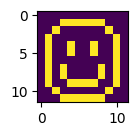

In [ ]:
# Let's load some potential input and training data
#
# Here, we'll load only the few images you just created. 
#
# In reality, training sets are very large.
# For example, the MNIST dataset has 60,000 training images.
# (https://en.wikipedia.org/wiki/MNIST_database)

# Two image paths
img_happy_path = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/smile.tif'
img_sad_path   = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/sad.tif'
img_sad2_path   = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/sad2.tif'

# Load images
img_happy = tiff.imread(img_happy_path)
img_sad   = tiff.imread(img_sad_path)
img_sad2  = tiff.imread(img_sad2_path)

# Show one image
fig, ax = plt.subplots(1,1, figsize=(3/2.54, 3/2.54))
_=ax.imshow(img_happy)

### Seaborn plotting (can be skipped)

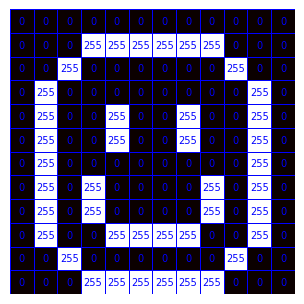

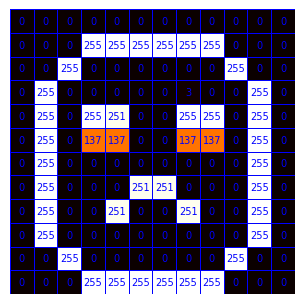

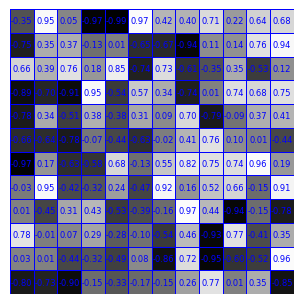

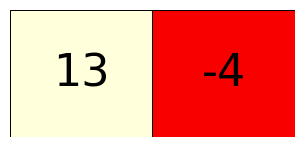

In [ ]:
# Let's use seaborn to create some more sophisticated plots
import seaborn as sns
def mw_showimg2(img, annotcolor='white',SX=8,SY=8,SF=7,VMIN=0,VMAX=255, CMAP='hot', FMT="d"):
    fig, ax = plt.subplots(1,1, figsize=(SX/2.54, SY/2.54))
    _ = sns.heatmap(img, annot=True,
                fmt=FMT, 
                cmap=CMAP, 
                annot_kws={"size": SF, "color": annotcolor},
                vmin=VMIN, vmax=VMAX,
                linewidths=.5, linecolor=annotcolor,
                ax=ax)
    ax.axis('off')
    ax.collections[0].colorbar.remove()
    plt.tight_layout()
    
# Plot the images
mw_showimg2(img_happy, annotcolor='blue')
mw_showimg2(img_sad2, annotcolor='blue')
# Plot some made-up weights
img_randomweights = np.random.uniform(-1, 1, (12, 12))
mw_showimg2(img_randomweights, annotcolor='blue', SF=6,VMIN=-1,VMAX=1.0, FMT=".2f", CMAP='gray')
# Plot some made-up output
mw_showimg2(np.array([[13,-4]]), annotcolor='black', SY=4, SF=32,VMIN=-14,VMAX=14,CMAP='hot')# gray

### Math (can be skipped)

For a prediction y_j, where j is referring to the categories that need predicting (e.g. $y_1$ high means a "happy" emoji, and a high $y_2$ value indicates the emoji is likely "sad"), $y_j$ values can be calculated from the $i\text{th}$ image pixel $x_i$ as follows (with $w_{i,j}$ being the weights):

$\huge y_j = \sum_{i} w_{i,j} * x_i$


### Defining a data loader

To train a model, pytorch needs to be able to quickly look at a load of data efficiently. In the pytorch workflow, a data class is defined, such that training data can be stored in tensor format, and can be supplied easily to the training algorithm later.

In [ ]:
class Data_HappySad(Dataset):
    # Again, we use a class, see above for an explanation.
    # (Remember the blueprint/house analogy.)
    #
    # This class is based on the pytorch "Dataset" class, defined
    # in the pytorch library. Data_HappySad is the name we 
    # give to this class. Hence the notation "Data_HappySad(Dataset)".
    
    def __init__(self, targetdevice="mps"):
        
        # Technical: tell the class how to store the data (e.g. on CPU or GPU)
        self.targetdevice = targetdevice
        
        # Data can be handled in many ways.
        # Here, we'll store some data in the object directly.
        # This can be done by the "self." command, which refers 
        # to the to-be-created object itself.
        #
        # The data needs to be converted to tensor for later use
        # We'll use the images loaded earlier, and store 3 images here
        self.data   = torch.tensor([img_happy, img_sad, img_sad2], 
                                   dtype=torch.float32)
        
        # Now, we supply also the true labels that need to be learned
        self.label  = torch.tensor([0        , 1,       1], 
                                   dtype=torch.long)
        
        # Technical: normalize the images
        self.data = self.data / 255.0
    
    def __len__(self):
        # Function required by pytorch; tells how many samples are in the dataset
        
        return len(self.data)
    
    def __getitem__(self, idx):
        # Function required by pytorch; tells how to get a specific item
        
        return self.data[idx].to(self.targetdevice), self.label[idx].to(self.targetdevice)
        
        

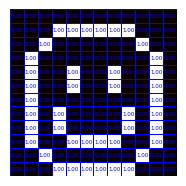

In [169]:
# Show an image from the dataloader

# Create an object from the class
data_happysad = Data_HappySad() 

# We can extract a sample and annotation from that class
# (This will later be done automatically in the training loop)
img, label = data_happysad[0]

# For now, let's convert it to the numpy format for illustration
# purposes
img_np = img.cpu().numpy()

# Plot it
mw_showimg2(img_np, annotcolor='blue', VMIN=0, VMAX=1.0, FMT=".2f", SX=5, SY=5, SF=4)


### Exercise

- Edit the code above, specifically the subfunction `__init__`, such that it will load the images you created earlier at the start of this notebook.
- Execute the code in the cell directly above, to check if you can make it show your own image.
- This code will show the first image in your dataset, can you also make it show the 2nd and 3rd image?

### Dataloader

We're now getting close to actually training this model. We'll need to define a dataloader. In more advanced neural network setups, the DataLoader provides convenient functionalities like shuffling the data, or loading it in parallel from disk. Here, we'll just use it to be able to loop over the data easily, and provide the data in batches of three images.

We'll also initialize the model itself (create an object from the class `VerySimpleNN` defined earlier).

In [174]:
# initialize the dataset and dataloader objects
my_data_happysad = Data_HappySad()
my_data_happysad_loader = torch.utils.data.DataLoader(my_data_happysad, 
                                                      batch_size=3, shuffle=False)

# initialize the model
my_simple_model  = VerySimpleNN().to('mps') 

In [171]:
# Let's check the data object works as expected
my_data_happysad.__getitem__(0)

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
         [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
         [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
         [0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.]], device='mps:0'),
 tensor(0, device='mps:0'))

### Question

- The amount of classes and library functions used at this point might be a bit overwhelming. Can you draw a cartoon that depicts the fundamental aspects of the workflow (or otherwise recreate an overview of it)?

### The actual training

Now we need to train the model by presenting it a picture, calculating the prediction (which might be completely off initially), determine which weight adjustments would improve the prediction (using the loss function), and update the weights accordingly. And repeat that multiple times.

Training a "real" neural network might take presenting the model with many images, for many iterations, and might take hours or days. 

Here, our extremely simple model will be trained swiftly.

In [175]:
# Create the training loop

# Define a loss function
# This function is defined such that it will have a high value
# if there is a large discrepancy between the predicted and true labels.
# Our aim is to minimize the observed loss during the training.
loss_fn = torch.nn.CrossEntropyLoss()
# Later, we'll determine in which directions to adjust the weights
# (called the gradient), that correspond to a reduction in the loss,
# the optimizer will be used to update (optimize) the weights accordingly.
optimizer = torch.optim.Adam(my_simple_model.parameters(), lr=.01)

# technical; set model to training mode
my_simple_model.train()

# For illustratory purposes, we'll track what happens with the
# gradients and weights during the training. In a more extensive
# model, this isn't possible, as this will be too much data.
gradient_list = [] # only for illustratory purposes
weight_list   = [] # only for illustratory purposes
loss_list     = []
# Now train for 300 iterations (called epochs when 1 iteration covers all data)
for epoch_idx in range(300):
    
    # This loop is a bit redundant here, since we have only 3 images,
    # in a usual scenario, e.g. with 60.000 images, you would loop
    # over those images in multiple batches. Here, we'll only
    # have 1 batch, containing three images, so this loop will
    # just iterate once.
    for b_idx, (X,y) in enumerate(my_data_happysad_loader): 

        # X will contain a batch of images
        # y will contain the corresponding labels

        # For illustrative purposes, we'll track the weights in the model
        # This isn't part of a usual training loop.
        weights = my_simple_model.linear.weight.detach().cpu().numpy()
        weight_list.append(weights)
    
        # Now determine the prediction for X based on current weights
        # (Note: the weights are stored inside the model object)
        # (Note: the model is programmed such that it will predict
        # for multiple images at once.)
        pred = my_simple_model(X)
        
        # Now we'll calculate the loss, or the discrepancy between
        # the predicted and true labels
        loss = loss_fn(pred, y)
        
        # And based on that calculation, we'll determine the gradients
        # (ie directions in which to adjust the weights to reduce the loss)
        loss.backward() 
    
        # For illustrative purposes, we'll track the gradients
        # This wouldn't be done in a usual training loop.        
        gradients = my_simple_model.linear.weight.grad.detach().cpu().numpy()
        gradient_list.append(gradients)
        # Similarly, also save the loss, this is actually also sometimes
        # monitored during "real" training scenarios.
        loss_list.append(loss.item())
    
        # Then we use the optimizer to apply the gradients
        optimizer.step()         
        # And we reset them before the next iteration
        optimizer.zero_grad()
    
        # Print some information to see what's going on
        print('epoch =', epoch_idx, 'batch =',b_idx,', loss = ', loss.item())#, 'X.shape=', X.shape)
        
    

epoch = 0 batch = 0 , loss =  0.6544490456581116
epoch = 1 batch = 0 , loss =  0.5567574501037598
epoch = 2 batch = 0 , loss =  0.5372422337532043
epoch = 3 batch = 0 , loss =  0.5049178004264832
epoch = 4 batch = 0 , loss =  0.45532819628715515
epoch = 5 batch = 0 , loss =  0.4097604751586914
epoch = 6 batch = 0 , loss =  0.38004443049430847
epoch = 7 batch = 0 , loss =  0.36113619804382324
epoch = 8 batch = 0 , loss =  0.3407091796398163
epoch = 9 batch = 0 , loss =  0.31464654207229614
epoch = 10 batch = 0 , loss =  0.2871895730495453
epoch = 11 batch = 0 , loss =  0.26353919506073
epoch = 12 batch = 0 , loss =  0.2455817461013794
epoch = 13 batch = 0 , loss =  0.23169080913066864
epoch = 14 batch = 0 , loss =  0.21895135939121246
epoch = 15 batch = 0 , loss =  0.20551292598247528
epoch = 16 batch = 0 , loss =  0.19138465821743011
epoch = 17 batch = 0 , loss =  0.17773592472076416
epoch = 18 batch = 0 , loss =  0.16574543714523315
epoch = 19 batch = 0 , loss =  0.1558397263288498
ep

### Questions

- Above you see a training loop, in the printed output below:
    - Why is the loss decreasing?
    - Optional: google what "learning rate" means. This is set by the `lr` parameter. If you like, you can re-initialize the model, adjust `lr` in the cell above, and see what the effect is.
    - What would happen to the loss if you'd train for more iterations? 
    - Would you reckon the training has worked? Will the model now recognize something?

### Loss value over time

Text(0, 0.5, 'Loss value')

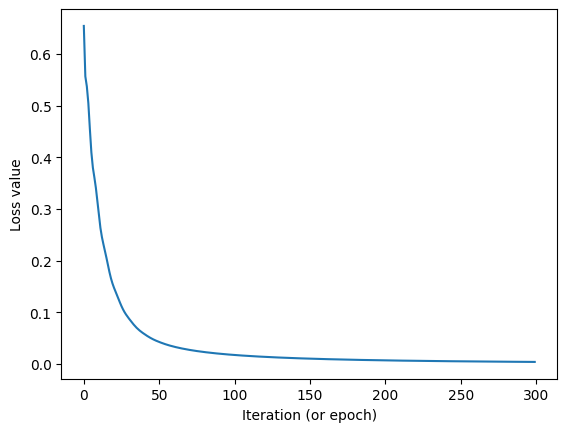

In [179]:
# Let's plot the loss value over time
_ = plt.plot(np.array(loss_list).squeeze())
plt.xlabel('Iteration (or epoch)'); plt.ylabel('Loss value')

### Visualization of what happened

The code below visualizes what happened during model training with the weights. Since this model is so simple, we can interpret the weights.

Text(0.5, 0.98, 'Weight evolution for "sad" class')

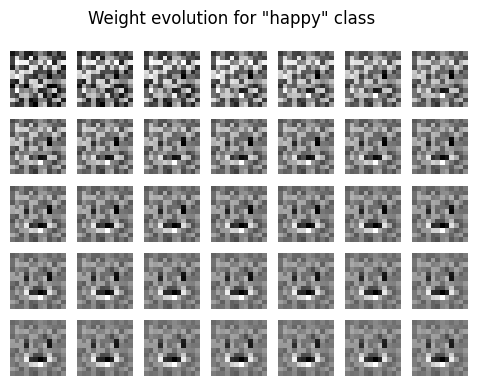

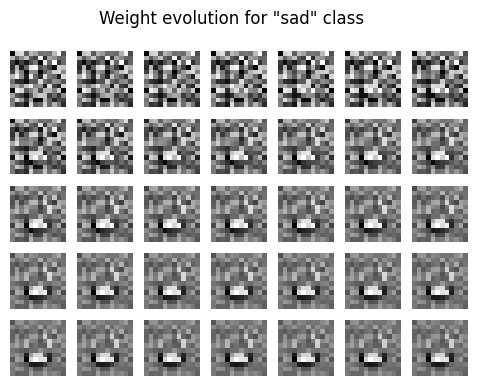

In [93]:
# visualize the weights
TO_SHOW_NR = 35
fig, axs = plt.subplots(TO_SHOW_NR//7, 7, figsize=(15/2.54, 15/2.54*(TO_SHOW_NR//7)/7))
# show the weights of weight_list[X][0] in a 5 x 7 grid
for weight_iteration in range(TO_SHOW_NR):
    pos_X = weight_iteration//7
    pos_Y = weight_iteration%7
    _ = axs[pos_X,pos_Y].imshow(weight_list[weight_iteration][0].reshape(12,12), cmap='gray')
    _ = axs[pos_X,pos_Y].axis('off')
plt.suptitle('Weight evolution for "happy" class')

# now the same for the "sad" class
fig, axs = plt.subplots(TO_SHOW_NR//7, 7, figsize=(15/2.54, 15/2.54*(TO_SHOW_NR//7)/7))
# show the weights of weight_list[X][1] in a 5 x 7 grid
for weight_iteration in range(TO_SHOW_NR):
    pos_X = weight_iteration//7
    pos_Y = weight_iteration%7
    _ = axs[pos_X,pos_Y].imshow(weight_list[weight_iteration][1].reshape(12,12), cmap='gray')
    _ = axs[pos_X,pos_Y].axis('off')
plt.suptitle('Weight evolution for "sad" class')
                                                   


### Questions

- Update the code `plt.suptitle`s above to reflect the categories that match the labels for the images you created yourself.
- Right to left, top to bottom, we see how the weights are updated over multiple iterations. Why do you think the weights change the way they do? 
    - Do you recognize any features in it from your input images?

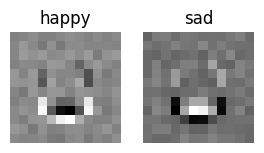

In [95]:
# show the final weights as images
fig, axs = plt.subplots(1,2, figsize=(8/2.54, 4/2.54))
_=axs[0].imshow(weight_list[-1][0].reshape(12,12),cmap='gray')
_=axs[1].imshow(weight_list[-1][1].reshape(12,12),cmap='gray')
_=axs[0].set_title('happy')
_=axs[1].set_title('sad')
_=axs[0].axis('off')
_=axs[1].axis('off')
                

### Questions
- Update the labels above according with your own data.
- Do you think overfitting is a problem for this model? (Will it recognize any data it didn't see yet?)
- In a more complex network architecture, do you think it will be possible to interpret weights in the same way as we did here?

## Proof of the pudding: did it work?

Let's feed the original input images to the model again, and look at the predictions. (In a real scenario, you'd hope the model will also be able to classify unseen data, with our limited training data and limited model, that's not something we can expect.)

In [ ]:
# apply the model to image 1
X1 = my_data_happysad.__getitem__(0)[0].unsqueeze(0)
pred = my_simple_model(X1)
print('X1=', pred)
# and to image 2
X2 = my_data_happysad.__getitem__(1)[0].unsqueeze(0)
pred = my_simple_model(X2)
print('X2=', pred)
# and to image 3
X3 = my_data_happysad.__getitem__(2)[0].unsqueeze(0)
pred = my_simple_model(X3)
print('X3=', pred)

X1= tensor([[ 2.0890, -1.5107]], device='mps:0', grad_fn=<LinearBackward0>)
X12 tensor([[-1.6538,  2.0169]], device='mps:0', grad_fn=<LinearBackward0>)
X3= tensor([[-2.6456,  3.4767]], device='mps:0', grad_fn=<LinearBackward0>)


### Questions

- Are the predictions correct?

# Congratulations!

You have reached the end of the machine learning part of this workshop! Let us know if you have any questions, comments or discussion points.

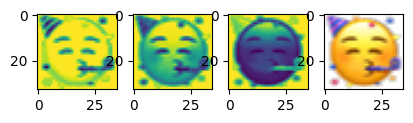

In [ ]:
img_party=tiff.imread('images/emoji/party.tif')
fig, axs = plt.subplots(1,4, figsize=(12/2.54, 3/2.54))
for ch in range(3):
    _=axs.flatten()[ch].imshow(img_party[:,:,ch])
_=axs.flatten()[3].imshow(img_party)

### More code for other purposes (can be skipped)

-0.828053 0.6682241


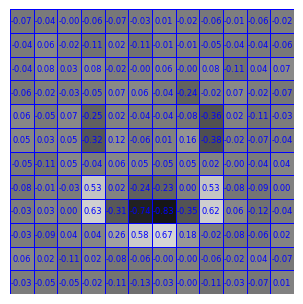

In [135]:
# Final weights in different style
print(np.min(weight_list[-1][0]), np.max(weight_list[-1][0]))
mw_showimg2(weight_list[-1][0].reshape((12,12)), 
            annotcolor='blue', VMIN=-1, VMAX=1.0, FMT=".2f", CMAP='gray', SF=6)

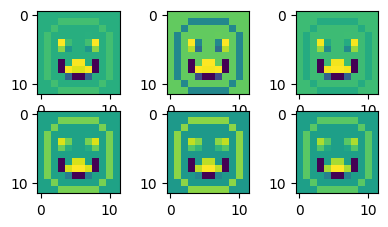

In [94]:
# show the first and second gradients
fig, axs = plt.subplots(2,3, figsize=(12/2.54, 6/2.54))
_=axs[0,0].imshow(gradient_list[0][0].reshape(12,12))
_=axs[0,1].imshow(gradient_list[1][0].reshape(12,12))
_=axs[0,2].imshow(gradient_list[2][0].reshape(12,12))
_=axs[1,0].imshow(gradient_list[3][0].reshape(12,12))
_=axs[1,1].imshow(gradient_list[4][0].reshape(12,12))
_=axs[1,2].imshow(gradient_list[5][0].reshape(12,12))

In [59]:
print(len(gradient_list))
gradient_list[0].shape
gradient_list[4][0].reshape((12,12)).shape

100


(12, 12)

In [61]:
# Doesn't seem to work ??
# from torchsummary import summary
# summary(my_simple_model, input_size=(12,12))

In [62]:
# There should be 12x12 + 1 + 12x12 + 1 = 290 model parameters
sum(p.numel() for p in my_simple_model.parameters() if p.requires_grad)

290